# SVM make_moons Classification

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
import joblib

### Load the dataset

In [2]:
df=pd.read_csv("D:\\make_moons.csv")
df.head(5)

,X,Y,label
0,-1.129064,-0.049047,0
1,0.264658,0.960315,0
2,0.604729,0.585562,0
3,-0.603916,0.789943,0
4,-0.591466,0.712346,0


In [3]:
#basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       1000 non-null   float64
 1   Y       1000 non-null   float64
 2   label   1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [4]:
#check duplicate value 
df.duplicated().sum()

np.int64(0)

### Train-test-split data

In [5]:
x=df.iloc[:,0:2]
y=df.label

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

### Model build and training 

In [7]:
model=SVC(kernel='rbf',probability=True)
model.fit(x_train,y_train)


SVC(probability=True)

### Evaluate model

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


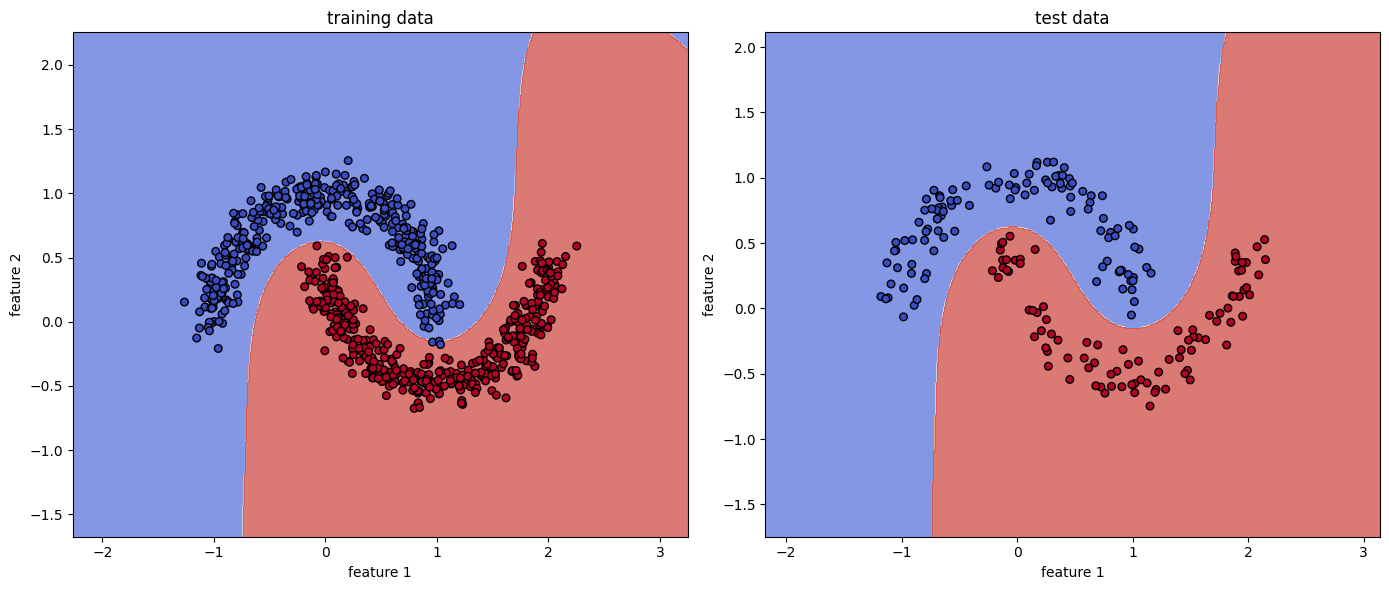

In [8]:
#plot decision boundary
def plot_decision_boundary(model,X,Y,ax,title):
    a=np.arange(X.iloc[:,0].min()-1,X.iloc[:,0].max()+1,step=0.01)
    b=np.arange(X.iloc[:,1].min()-1,X.iloc[:,1].max()+1,step=0.01)
    xx,yy=np.meshgrid(a,b)
    inp=np.array([xx.ravel(),yy.ravel()]).T
    z=model.predict(inp).reshape(xx.shape)
    ax.contourf(xx,yy,z,cmap='coolwarm',alpha=0.7)
    ax.scatter(X.iloc[:,0],X.iloc[:,1],c=Y,edgecolor='k',cmap='coolwarm',s=30)
    ax.set_title(title)
    ax.set_xlabel("feature 1")
    ax.set_ylabel("feature 2")

fix,axes=plt.subplots(1,2,figsize=(14,6))
plot_decision_boundary(model,x_train,y_train,axes[0],"training data")
plot_decision_boundary(model,x_test,y_test,axes[1],"test data")
plt.tight_layout()
plt.show()

In [9]:
#calculate accuracy score 
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy score of svm={accuracy*100:.1f}%')


Accuracy score of svm=100.0%


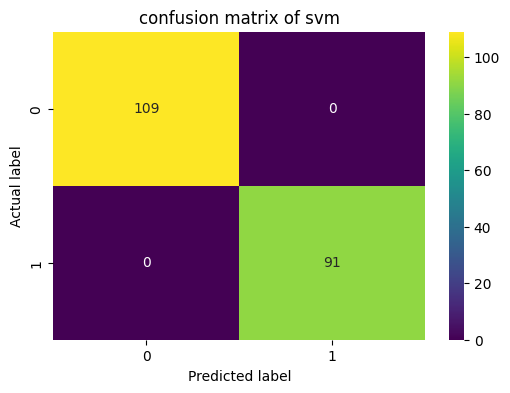

In [10]:
#Plot confusion matrix
con=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(con,annot=True,fmt='d',cmap='viridis',xticklabels=set(y),yticklabels=set(y))
plt.title("confusion matrix of svm")
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.show()

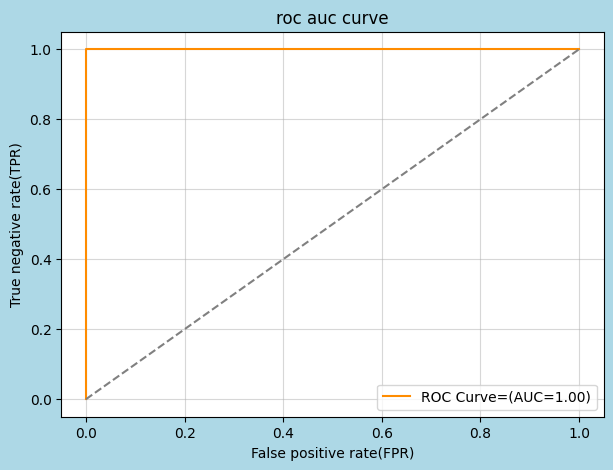

In [11]:
#plot roc_auc curve
prob_score=model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
auc_score=roc_auc_score(y_test,prob_score)
plt.figure(facecolor='lightblue',figsize=(7,5))
plt.plot(fpr,tpr,color='darkorange',label=f"ROC Curve=(AUC={auc_score:.2f})")
plt.plot([0,1],[0,1],color='grey',linestyle='--')
plt.xlabel("False positive rate(FPR)")
plt.ylabel("True negative rate(TPR)")
plt.grid(alpha=0.5)
plt.title("roc auc curve")
plt.legend(loc="lower right")
plt.show() 

In [12]:
#print classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        91

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



### save the model

In [13]:
joblib.dump(model,'svm_moons_model.joblib')

['svm_moons_model.joblib']